# Assignment Week 2 

* Answer each question completely. 
* Include your code and summarize what you see in a brief narrative.

__Charting:__
Remember to make your charts as self-sufficient as possible (i.e., labels, titles, lack of clutter)  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/car_prices/car_prices.csv', low_memory=False)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493484 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547043 non-null  object 
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558837 non-null  object 
 14  sellingprice  558837 non-null  int64  
 15  saledate      558837 non-null  object 
dtypes: float64(1), int64(2), object(13)
memory usage: 68.2+ MB


# Data Description:
- year: year the car was built (e.g., the model year)  
- make: the manufacturer. 
- model: specific model of the car  
- trim: subtype of the car model. 
- body: body style of the car. 
- transmission: type of transmission  
- state: state car is registered. 
- condition: numerical rating of the condition, higher is better.  
- odometer: number of miles the car has been driven.   
- color: color of the car.  
- interior: type of interior (e.g., seats). 
- mmr: estimated wholesale price of the car if auctioned.  
- sellingprice: actual sales price of the car.

In [2]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


## Question 1. Determine the number of missing values in each column.

In [3]:
missing_counts=df.isnull().sum()
missing_counts

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65353
vin                 4
state               0
condition       11794
odometer           94
color             749
interior          749
seller              0
mmr                 0
sellingprice        0
saledate            0
dtype: int64

isnull() gives a dataframe with True or False True if that corresponding value is missing False if value value is not missing <br>
sum() count number of True

## Question 2. Check the data types.
- Which columns are coded to the incorrect type? If any, correct them.

In [4]:
df['condition'].unique()

array(['5', '4.5', '4.1', '4.3', '1', '3.4', '2', '4.2', '3', '4.8', nan,
       '4.9', '1.7', '1.9', '2.9', '3.8', '4.4', '4.7', '3.2', '4', '2.5',
       '3.7', '3.9', '3.1', '2.8', '4.6', '3.6', '3.5', '2.6', '2.1',
       '2.2', '2.7', '2.4', '3.3', '2.3', '1.5', '1.6', '1.8', '1.2',
       '1.4', '1.1', '1.3', 'oh', 'ms', 'co', 'fl', 'sc', 'ca', 'pa',
       'in', 'va', 'ga', 'wi', 'tx'], dtype=object)

In [5]:
df[df['condition'].isin(['oh', 'ms', 'co', 'fl', 'sc', 'ca', 'pa',
       'in', 'va', 'ga', 'wi', 'tx'])]

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
408161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj4fm201708,oh,4.6,4802,silver,gray,vw credit prequalified,13200,16500
417835,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm258506,ms,1.0,9410,white,gray,enterprise vehicle exchange / tra / birmingham,13300,10500
421289,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj3fm276741,co,4.6,1167,blue,black,tdaf remarketing,13200,12700
424161,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj2fm285365,ms,1.0,2172,gray,black,enterprise vehicle exchange / tra / birmingham,14050,8250
427040,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj0fm227318,fl,4.1,14872,gray,black,enterprise veh exchange/rental,13700,14300
427043,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj6fm218641,fl,4.9,12655,red,black,enterprise veh exchange/rental,13850,14500
434424,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj7fm223475,fl,4.6,15719,blue,black,sixt rent a car llc,13650,13500
444501,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm297123,sc,2.0,6388,white,black,enterprise vehicle exchange / tra / rental / t...,13850,10700
453794,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj5fm219943,fl,4.4,16633,silver,black,sixt rent a car llc,13600,13600
461597,2015,Volkswagen,Jetta,SE PZEV w/Connectivity,Navitgation,Sedan,automatic,3vwd17aj9fm219766,ca,4.4,11034,black,black,premium auto wholesale,13900,13000


as some rows are filled wrongly dropping them

In [6]:
index_drop=df[df['condition'].isin(['oh', 'ms', 'co', 'fl', 'sc', 'ca', 'pa',
       'in', 'va', 'ga', 'wi', 'tx'])].index
index_drop

Int64Index([408161, 417835, 421289, 424161, 427040, 427043, 434424, 444501,
            453794, 461597, 461612, 492484, 497008, 497011, 499083, 501455,
            505299, 505306, 520461, 528996, 529009, 529013, 529622, 548784,
            551222, 554710],
           dtype='int64')

In [7]:
df.drop(index_drop,inplace=True)

In [8]:
df['condition'].unique()

array(['5', '4.5', '4.1', '4.3', '1', '3.4', '2', '4.2', '3', '4.8', nan,
       '4.9', '1.7', '1.9', '2.9', '3.8', '4.4', '4.7', '3.2', '4', '2.5',
       '3.7', '3.9', '3.1', '2.8', '4.6', '3.6', '3.5', '2.6', '2.1',
       '2.2', '2.7', '2.4', '3.3', '2.3', '1.5', '1.6', '1.8', '1.2',
       '1.4', '1.1', '1.3'], dtype=object)

As 'condition' now only contains numeric values it can be casted to numeric

In [9]:
df['condition']=df['condition'].astype('float')

In [10]:
type(df['condition'][0])

numpy.float64

mmr data type is object which can be changed to int so as to enable some checks on that column

In [11]:
df['mmr']=df['mmr'].astype('int')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558811 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int32  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(11)
memory usage: 86.5+ MB


condition and mmr datatypes are updated

## Question 3. Analyze the `make` column.
- Comment on what you observe.  
- Clean the column to reduce the number of unique values to as few as reasonably possible (no hard coding). 

Hint: What do you notice if you run this:
```python
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
sorted(makes)
```

In [13]:
makes = df.make.unique().tolist()
makes1 = [str(x) for x in makes]
print(sorted(makes1))
makes = [str(x).lower() for x in makes]
print(sorted(makes))
print(len(makes))

['Acura', 'Aston Martin', 'Audi', 'BMW', 'Bentley', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Daewoo', 'Dodge', 'FIAT', 'Ferrari', 'Fisker', 'Ford', 'GMC', 'Geo', 'HUMMER', 'Honda', 'Hyundai', 'Infiniti', 'Isuzu', 'Jaguar', 'Jeep', 'Kia', 'Lamborghini', 'Land Rover', 'Lexus', 'Lincoln', 'Lotus', 'MINI', 'Maserati', 'Mazda', 'Mercedes-Benz', 'Mercury', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Plymouth', 'Pontiac', 'Porsche', 'Ram', 'Rolls-Royce', 'Saab', 'Saturn', 'Scion', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen', 'Volvo', 'acura', 'airstream', 'audi', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'dodge', 'dodge tk', 'dot', 'ford', 'ford tk', 'ford truck', 'gmc', 'gmc truck', 'honda', 'hyundai', 'hyundai tk', 'jeep', 'kia', 'land rover', 'landrover', 'lexus', 'lincoln', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercury', 'mitsubishi', 'nan', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'smart', 'subaru', 'suzuki', 'toyot

Same makes have multiple entries because of change in Letter case hence making the column to lower to reduce number of unique values

In [14]:
df['make']=df['make'].str.lower()

In [15]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
print(sorted(makes))
print(len(makes))

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chev truck', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dodge tk', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'ford tk', 'ford truck', 'geo', 'gmc', 'gmc truck', 'honda', 'hummer', 'hyundai', 'hyundai tk', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mazda tk', 'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nan', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw']
67


Around 30 are reduced <br>
But in some makes for some makes there are multiple rows like ford, ford tk, ford truck
<br>hence replacing tk with truck and
<br>removing truck from string

In [16]:
df['make']=df['make'].replace(' tk',' truck',regex=True) #replacing string ending with ' tk' to 'truck'

In [17]:
df['make']=df['make'].replace(' truck','',regex=True)

In [18]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
print(sorted(makes))
print(len(makes))

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chev', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'landrover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes', 'mercedes-b', 'mercedes-benz', 'mercury', 'mini', 'mitsubishi', 'nan', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo', 'vw']
61


replacing 'landrover' to 'land rover', 'mercedes-b', 'mercedes-benz' to 'mercedes' and 'vw' to 'volkswagen'

In [19]:
df['make']=df['make'].replace({'landrover':'land rover','mercedes-b':'mercedes','mercedes-benz':'mercedes','vw':'volkswagen'})

In [20]:
makes = df.make.unique().tolist()
makes = [str(x).lower() for x in makes]
print(sorted(makes))
print(len(makes))

['acura', 'airstream', 'aston martin', 'audi', 'bentley', 'bmw', 'buick', 'cadillac', 'chev', 'chevrolet', 'chrysler', 'daewoo', 'dodge', 'dot', 'ferrari', 'fiat', 'fisker', 'ford', 'geo', 'gmc', 'honda', 'hummer', 'hyundai', 'infiniti', 'isuzu', 'jaguar', 'jeep', 'kia', 'lamborghini', 'land rover', 'lexus', 'lincoln', 'lotus', 'maserati', 'mazda', 'mercedes', 'mercury', 'mini', 'mitsubishi', 'nan', 'nissan', 'oldsmobile', 'plymouth', 'pontiac', 'porsche', 'ram', 'rolls-royce', 'saab', 'saturn', 'scion', 'smart', 'subaru', 'suzuki', 'tesla', 'toyota', 'volkswagen', 'volvo']
57


Total unique makes are reduced from 97 to 57

## Question 4. Analyze the relationship between the wholeprice `mmr` and the `salesprice`.
- What is the overall correlation?  
- What happens to the correlation as you increase the maximum selling price window (e.g., 0-10000, 0-20000,...)?
- Create a scatter plot with the relationship.  
- Create a graph that shows how the correlation changes.

In [21]:
correlation=df.corr()
correlation

,year,condition,odometer,mmr,sellingprice
year,1.000000,0.551282,-0.772720,0.596623,0.586488
condition,0.551282,1.000000,-0.538874,0.485050,0.538788
odometer,-0.772720,-0.538874,1.000000,-0.588107,-0.582405
mmr,0.596623,0.485050,-0.588107,1.000000,0.983634
sellingprice,0.586488,0.538788,-0.582405,0.983634,1.000000


In [22]:
overall_correlation = df['mmr'].corr(df['sellingprice'])
overall_correlation

0.9836337168977258

- Wholeprice mmr and the salesprice are positively correlated with a correlation value of 0.983634

In [23]:
df['sellingprice'].max()

230000

In [24]:
windows= [i for i in range(10000,240000,10000) ]
correlations=[df[df['sellingprice'] <= window]['mmr'].corr(df[df['sellingprice'] <= window]['sellingprice']) for window in windows]
#filtering data frame for each window and calucating correspoding correlation between mmr and selling price
for i in range(len(windows)):
    print('Correlation for Selling price 0 to',windows[i],'is ',correlations[i])

Correlation for Selling price 0 to 10000 is  0.8743542721249603
Correlation for Selling price 0 to 20000 is  0.9584428323123241
Correlation for Selling price 0 to 30000 is  0.9744203460442995
Correlation for Selling price 0 to 40000 is  0.9791682459086504
Correlation for Selling price 0 to 50000 is  0.9812713466602414
Correlation for Selling price 0 to 60000 is  0.982240196031103
Correlation for Selling price 0 to 70000 is  0.9827082643538262
Correlation for Selling price 0 to 80000 is  0.9831862576819879
Correlation for Selling price 0 to 90000 is  0.9834269274590401
Correlation for Selling price 0 to 100000 is  0.9835761128330057
Correlation for Selling price 0 to 110000 is  0.9835897120182335
Correlation for Selling price 0 to 120000 is  0.9836722973053684
Correlation for Selling price 0 to 130000 is  0.9837452115182949
Correlation for Selling price 0 to 140000 is  0.9838139061890876
Correlation for Selling price 0 to 150000 is  0.9838873814578444
Correlation for Selling price 0 to 

In [25]:
#another way to calculate correlation
correlations1 = [df.loc[df['sellingprice'] <= window, ['mmr', 'sellingprice']].corr().iloc[0,1] for window in windows]
print(correlations1)

[0.8743542721249795, 0.9584428323123199, 0.974420346044272, 0.9791682459086682, 0.981271346660262, 0.9822401960310664, 0.9827082643538099, 0.9831862576820071, 0.9834269274590759, 0.9835761128330239, 0.9835897120182545, 0.9836722973053607, 0.9837452115183194, 0.9838139061891062, 0.983887381457838, 0.9839572313793269, 0.9840077311787709, 0.9840226043763788, 0.9840312414363478, 0.9840312414363478, 0.9840312414363478, 0.9840312414363478, 0.9836337168977242]


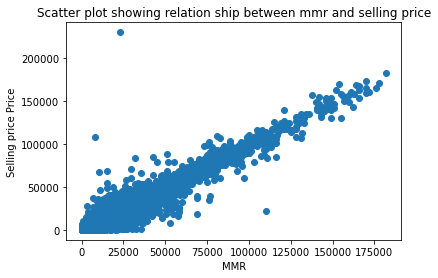

In [26]:
plt.scatter(df['mmr'], df['sellingprice'])
plt.xlabel('MMR')
plt.ylabel('Selling price Price')
plt.title('Scatter plot showing relation ship between mmr and selling price')
plt.show()

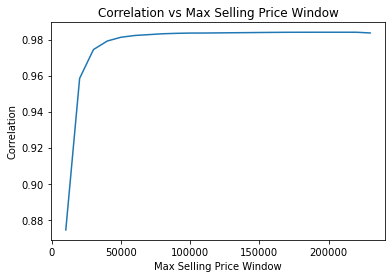

In [27]:
plt.plot(windows, correlations)
plt.xlabel('Max Selling Price Window')
plt.ylabel('Correlation')
plt.title('Correlation vs Max Selling Price Window')
plt.show()


- As the maximum selling price is increasing there is a strong correlation between mmr and selling price

## Question 5. How does the distribution of `salesprice` vary by make for cars made between 2010-2015?
- Use the 10 most common makes (your cleaned version of this column).  
- Create a graph that answers this question.

In [28]:
make_df=df[(df['year']>=2010) & (df['year']<=2015)]
make_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365997 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          365997 non-null  int64  
 1   make          363467 non-null  object 
 2   model         363369 non-null  object 
 3   trim          363433 non-null  object 
 4   body          362970 non-null  object 
 5   transmission  321028 non-null  object 
 6   vin           365997 non-null  object 
 7   state         365997 non-null  object 
 8   condition     363813 non-null  float64
 9   odometer      365985 non-null  float64
 10  color         365403 non-null  object 
 11  interior      365403 non-null  object 
 12  seller        365997 non-null  object 
 13  mmr           365997 non-null  int32  
 14  sellingprice  365997 non-null  int64  
 15  saledate      365997 non-null  object 
dtypes: float64(2), int32(1), int64(2), object(11)
memory usage: 46.1+ MB


In [29]:
sorted_df=make_df['make'].value_counts(sort=True)[:10].to_frame().reset_index().rename(columns={'index':'make','make':'Count'})
sorted_df

,make,Count
0,ford,70565
1,nissan,42374
2,chevrolet,38161
3,toyota,26263
4,dodge,20169
5,hyundai,17899
6,honda,15644
7,kia,15347
8,infiniti,12720
9,bmw,11905


In [30]:
final_df=make_df[make_df['make'].isin(list(sorted_df['make']))]
final_df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,bmw,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
4,2014,bmw,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)


In [31]:
final_df['make'].unique()

array(['kia', 'bmw', 'nissan', 'chevrolet', 'ford', 'hyundai', 'infiniti',
       'toyota', 'dodge', 'honda'], dtype=object)

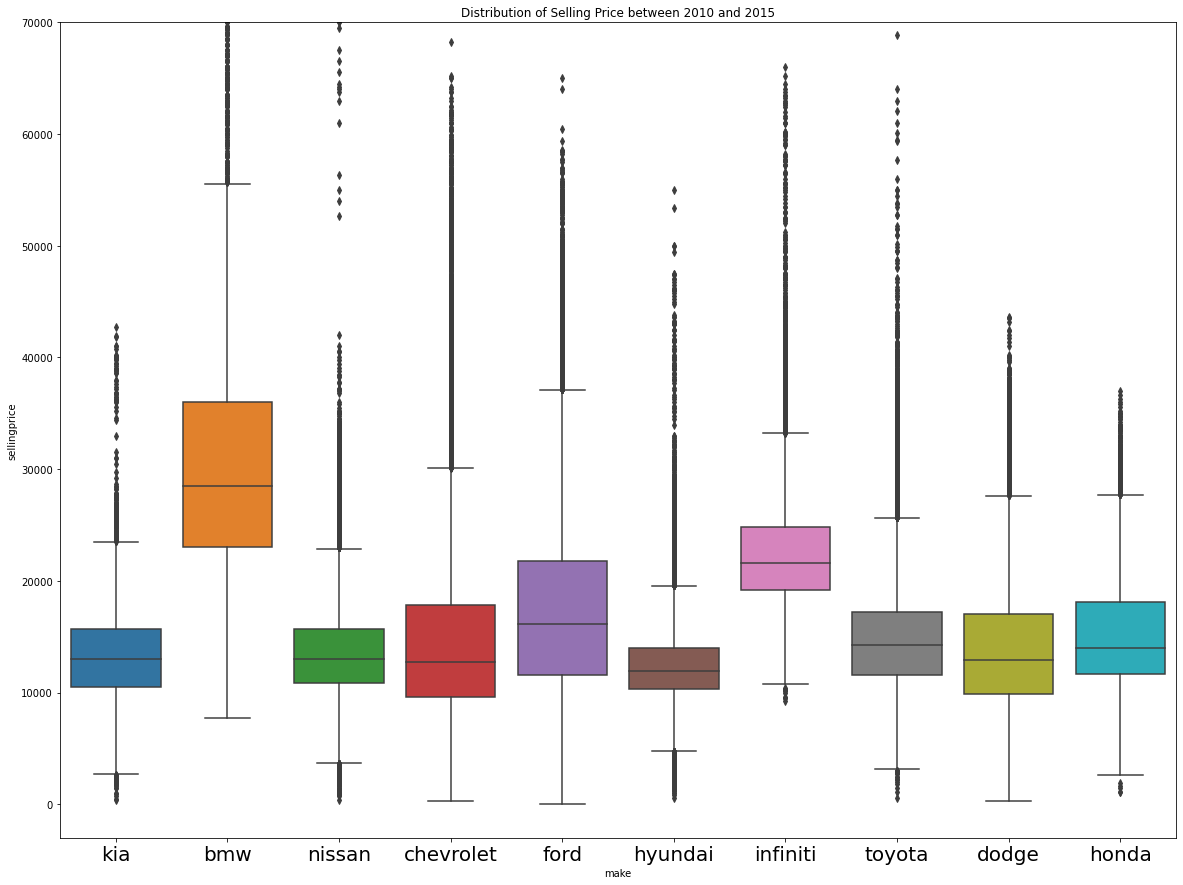

In [32]:
plt.figure(figsize=(20,15))
ax=sns.boxplot(x='make',y='sellingprice',data=final_df)
plt.title("Distribution of Selling Price between 2010 and 2015")
plt.xticks(fontsize=20)
ax.set_ylim([-3000, 70000])  
plt.show()

- The above graph shows the distribution of salesprice varying by make for cars made between 2010-2015
- The sales price of most of the makes lies in range of 10000 and 40000.
- All other makes except BMW show a range of around 7000 diiference in thier various models
- BMW has a range of around 10000 